ML makes it easier for us to put things into neat little categories. Not everything is a neat little category. Sometimes it's a number on a scale.

# Linear Regression
The simplest form of regression.

Imagine a table of data with many rows of an input x, which always outputs a y. When plotting this on a graph, we could fit a line through the data to predict it — a line would be of the form y = mx + c, so we want to figure out what m and c are using regression so that when there's a new x, we can predict a y.


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5367 -3.4175 -0.4375  2.9032 16.4520 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79778    2.76324   0.289    0.773    
x            1.97376    0.05344  36.935   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.854 on 98 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9323 
F-statistic:  1364 on 1 and 98 DF,  p-value: < 2.2e-16


Predicted y for x = 55 is 109.3548 


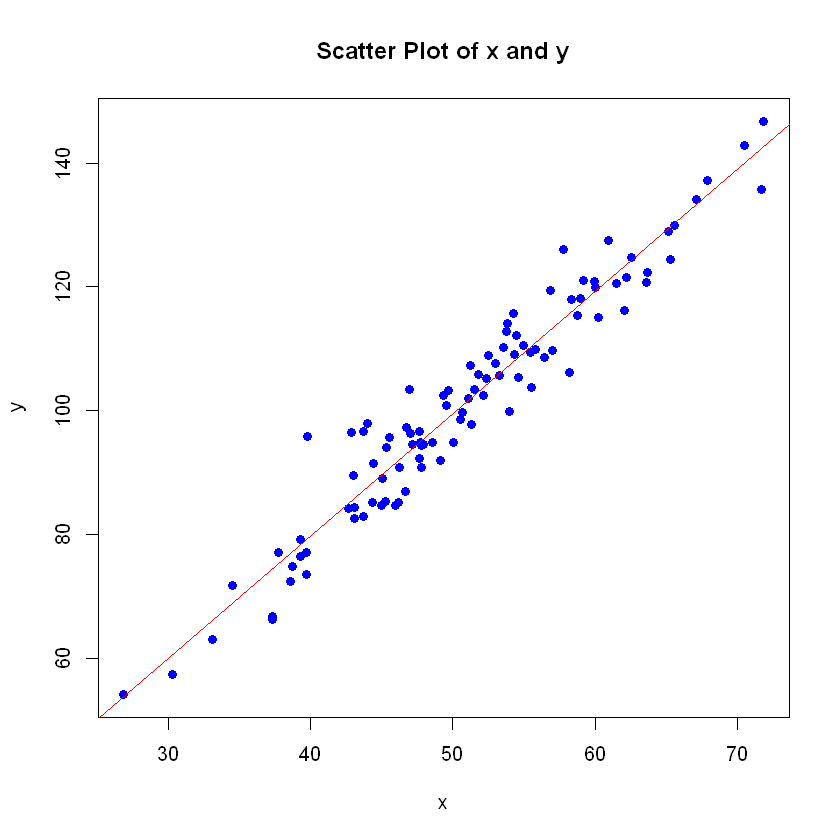

In [1]:
# Generating some sample data
set.seed(123)
x <- rnorm(100, mean = 50, sd = 10)  # 100 random numbers from a normal distribution
y <- 2 * x + rnorm(100, mean = 0, sd = 5)  # y = 2x + noise

# Plotting
plot(x, y, main = "Scatter Plot of x and y", xlab = "x", ylab = "y", pch = 16, col = "blue")

# Now we'll fit a linear model
model <- lm(y ~ x)

# We summarize the model to get the coefficients m and c
summary(model)

# The fitted line is of the form y = mx + c
# We add this line to the plot
abline(model, col = "red")

# Now, let's predict a new y for a given x
new_x <- 55
predicted_y <- predict(model, newdata = data.frame(x = new_x))

cat("Predicted y for x =", new_x, "is", predicted_y, "\n")

# Multivariate Linear Regression

Of course, we are only using one independent variable here (x), but you can do this with multiple variables.

Let's use this data from superconductors to try and predict the critical temperature based on the other attributes.

Rows: 21263 Columns: 82
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (82): number_of_elements, mean_atomic_mass, wtd_mean_atomic_mass, gmean_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


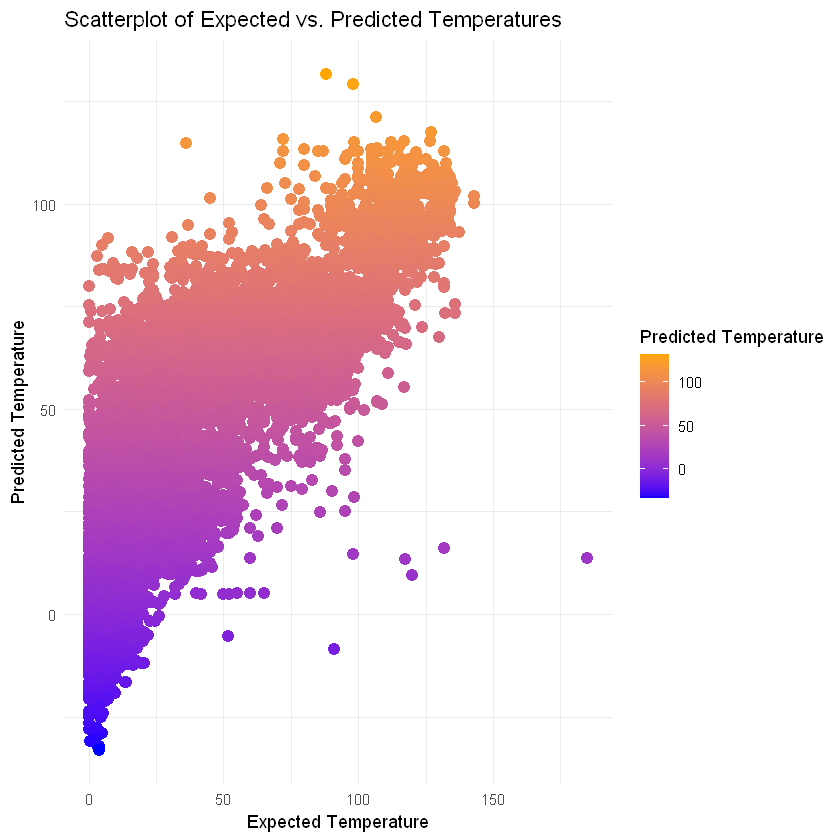

In [3]:
library(ggplot2)
library(readr)  # For reading CSV files

# Superconductor data
data <- read_csv("train.csv")

# Fit our model
model <- lm(critical_temp ~ ., data = data)

# Generate predictions
data$predicted_temp <- predict(model, newdata = data)

# Scatterplot of expected vs. predicted
ggplot(data, aes(x = critical_temp, 
                 y = predicted_temp, color = predicted_temp)) +
  geom_point(size = 3) +
  scale_color_gradient(low = "blue", high = "orange") +
  labs(title = "Scatterplot of Expected vs. Predicted Temperatures",
       x = "Expected Temperature",
       y = "Predicted Temperature",
       color = "Predicted Temperature") +
  theme_minimal()

# Artificial Neural Networks

ANNS are inspired by the human brain. An ANN is composed of layers of nodes, called neurons, where each neuron is connected to neurons in the previous and next layers. 
These connections have weights, which are adjusted during training to minimize the error in predictions.

Imagine a simple ANN with three layers: an input layer, a hidden layer, and an output layer. Each neuron in the hidden and output layers performs a weighted sum of its inputs, adds a bias, and passes the result through an activation function.

The output of each neuron is calculated as follows:
- For a neuron j, the input is a vector x.
- The weighted sum is calculated as z_j = w_j1 * x_1 + w_j2 * x_2 + ... + w_jn * x_n + b_j, where w are the weights and b is the bias.
- The output is then f(z_j), where f is the activation function (e.g., sigmoid, ReLU).
By adjusting the weights and biases during training, the ANN learns to make accurate predictions. This process is called backpropagation, where the error is propagated backward through the network to update the weights.


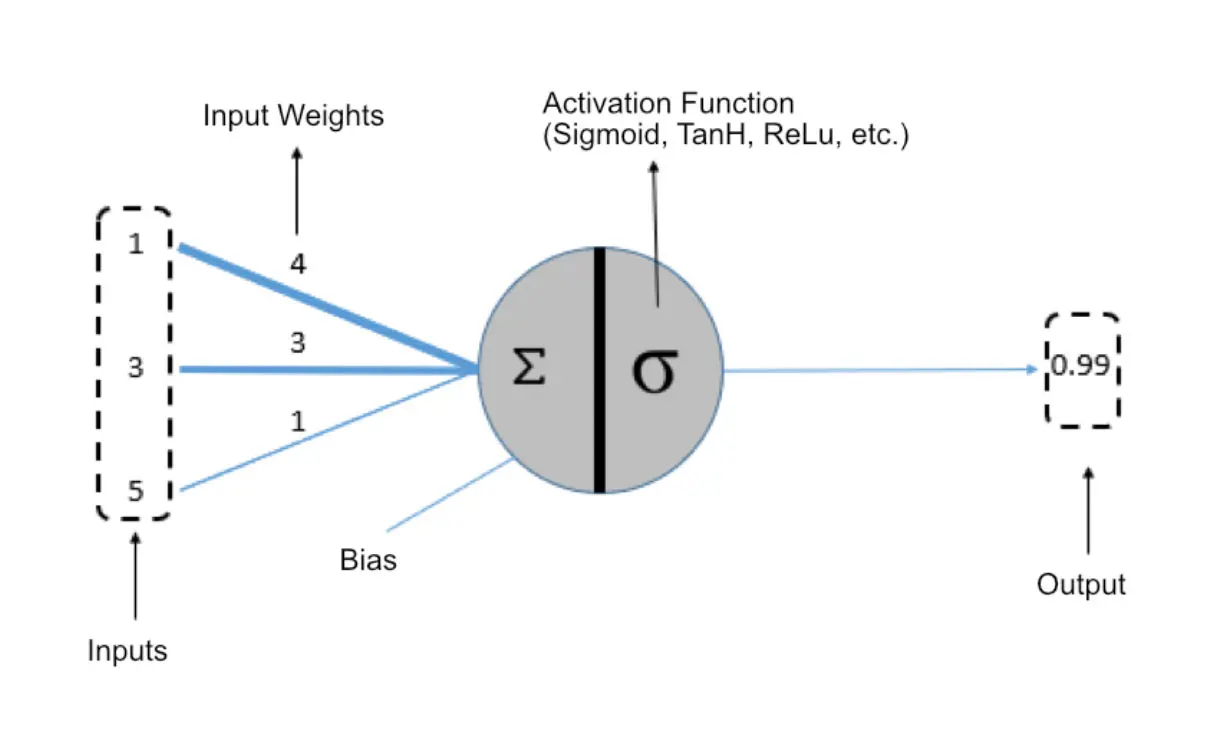

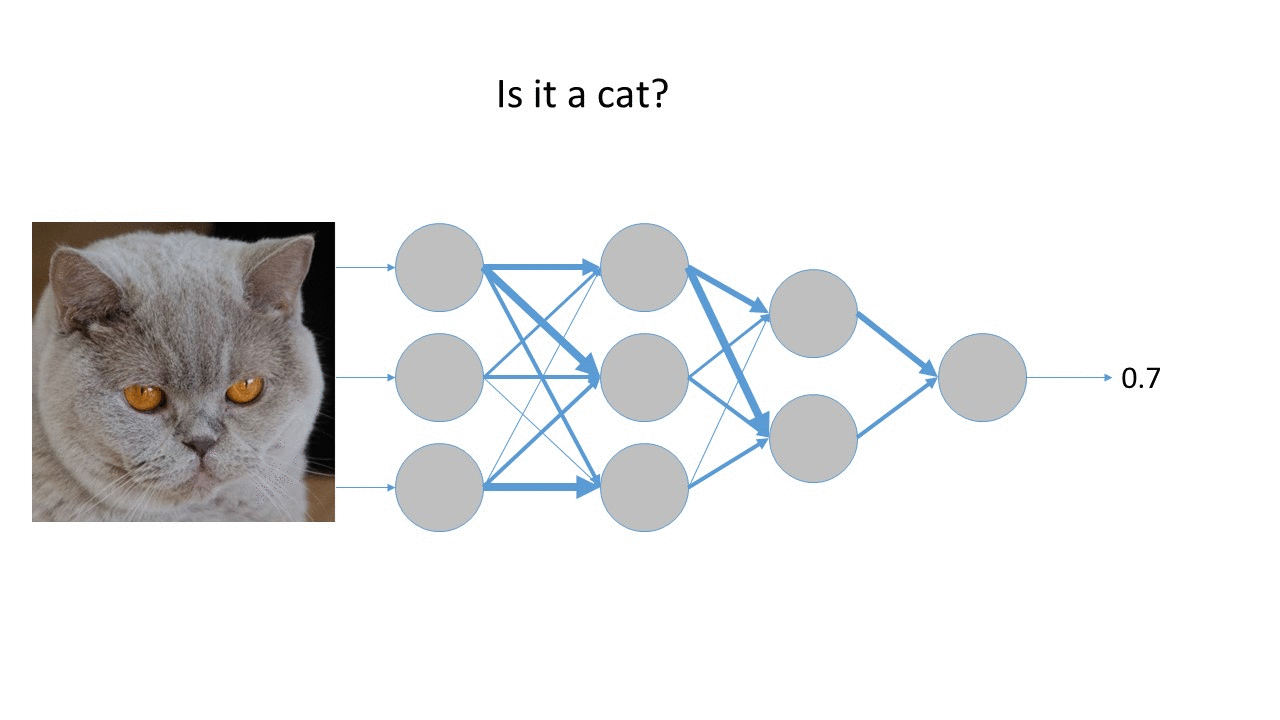